In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Titanic dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# EXPLORE the DATASET

In [5]:
data.shape
print('Rows:',data.shape[0])
print('Columns:',data.shape[1])

Rows: 891
Columns: 12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here it can be seen that there are missing values in Embarked, Cabin, Age

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Here there are posibilites of outliers in Age and Fare column

In [8]:
data.describe(include=object).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [9]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


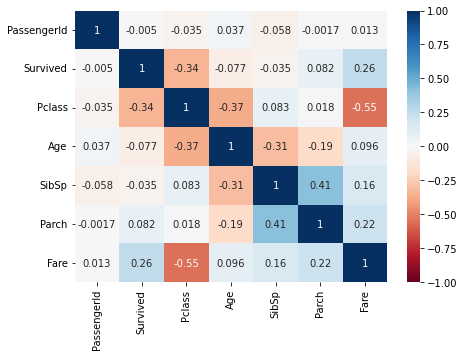

In [10]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)
plt.show()

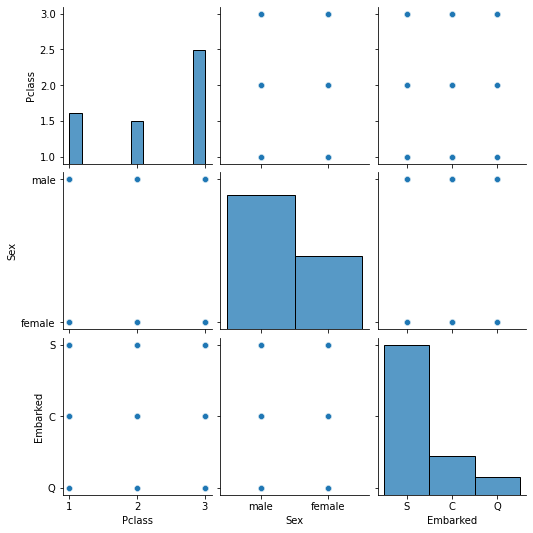

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)
plt.show()

## Data Analysis on Survived

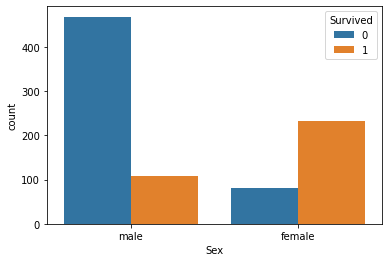

In [12]:
sns.countplot(data['Sex'], hue=data['Survived'])

plt.show()

In [13]:
data_sex = data.groupby(by=['Sex','Survived'])['Survived'].count()

In [14]:
print('Females Survived %.2f%%'%((data_sex['female'][1]/(data_sex['female'][0]+data_sex['female'][1])*100)))
print('Males Survived %.2f%%'%((data_sex['male'][1]/(data_sex['male'][0]+data_sex['male'][1])*100)))

Females Survived 74.20%
Males Survived 18.89%


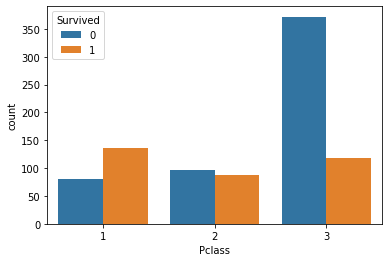

In [15]:
sns.countplot(data['Pclass'], hue=data['Survived'])

plt.show()

In [16]:
data_pclass = data.groupby(by=['Pclass','Survived'])['Survived'].count()

In [17]:
data_pclass

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [18]:
print('1st Class Survived %.2f%%'%((data_pclass[1][1]/(data_pclass[1][0]+data_pclass[1][1])*100)))
print('2nd Class Survived %.2f%%'%((data_pclass[2][1]/(data_pclass[2][0]+data_pclass[2][1])*100)))
print('3rd Class Survived %.2f%%'%((data_pclass[3][1]/(data_pclass[3][0]+data_pclass[3][1])*100)))

1st Class Survived 62.96%
2nd Class Survived 47.28%
3rd Class Survived 24.24%


In [19]:
def age_category(age):
    if age<=12:
        return 'Children'
    elif age>12 and age<=18:
        return 'Teenage'
    elif age>18 and age<=30:
        return 'Youth'
    elif age>30 and age<=45:
        return 'Midage'
    elif age>45 and age<60:
        return 'Oldage'
    else:
        return 'Seniors'

In [20]:
data['AgeCategory'] = data['Age'].apply(age_category)

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Midage
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Midage
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Midage


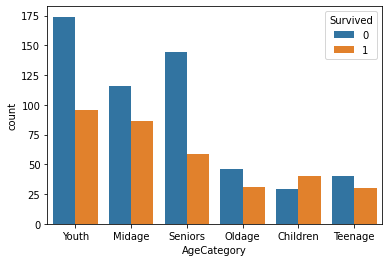

In [22]:
sns.countplot(data['AgeCategory'], hue=data['Survived'])
plt.show()

In [23]:
observed = pd.crosstab(data['AgeCategory'],data['Survived'])

In [24]:
# H0: The Survived is Independent of Age Category
# H1: The Survived  Depends upon the Age Category
from scipy.stats import chi2_contingency

chi,p,dof,expected = chi2_contingency(observed)
print('Chi sq: ',chi)
print('p-value: ',p)
if p<0.05:
    print('Accept The H1:')
else:
    print('Accept the H0:')

Chi sq:  21.76819364956196
p-value:  0.0005794728331556137
Accept The H1:


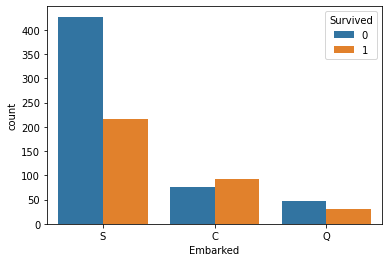

In [25]:
sns.countplot(data['Embarked'], hue=data['Survived'])
plt.show()

In [26]:
# Does the Survived Depends upon Fare Price??
fare_surv = data[data['Survived']==1]['Fare']
fare_nsurv = data[data['Survived']==0]['Fare']

In [27]:
from statsmodels.stats.weightstats import ztest

In [28]:
# H0: There is no difference in Fare of Surv and Fare of not Surv
# H1: The two samples are different

z_score,p_value = ztest(fare_surv,fare_nsurv)
print('z-score: ',z_score)
print('p-value: ',p_value)
if p_value<0.05:
    print('Accept The H1:')
else:
    print('Accept the H0:')

z-score:  7.939191660871055
p-value:  2.035031103573989e-15
Accept The H1:


## Detect and Treat the missing Values

In [29]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
AgeCategory     0.000000
dtype: float64